In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd 
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual
import matplotlib.ticker as tck
import os
sns.set_context("paper", rc = {'lines.markersize': 50})
sns.set(font_scale = 1.2)
sns.set_style("ticks")
# sns.set_palette("Reds")


In [ ]:
sns.set_palette("twilight_shifted")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Typewriter",
    # "figure.figsize": (9,5)
})
# palette = sns.color_palette('twilight_shifted', 4)

In [2]:
data_csv = "./data.csv"
data_df = pd.read_csv(data_csv, comment='#')
data_df['ratio'] = data_df['time'] / data_df['model']
data_df['ratio-bw'] = data_df['time'] / data_df['model-bw']
# data_df
data_df['diff'] = 0
df_group = data_df.groupby(['simulation','analysis','data','node','scenario'])
for index, group in df_group:
    data_df['diff'][data_df.index.isin(group.index)] = group['time'] / group[group['heuristic'] == 'model-model']['time'].values[0]
data_df


/home/cc/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,simulation,analysis,data,node,scenario,heuristic,time,model,model-bw,ideal-normalization,model-normalization,ratio,ratio-bw,diff
0,1,4,4,128,ideal,model-model,5.2387,5.062746,5.062746,1.000000,1.000000,1.034755,1.034755,1.000000
1,1,4,4,128,ideal,model-even,5.4420,5.265256,5.265256,1.000000,1.038807,1.033568,1.033568,1.038807
2,1,4,4,128,ideal,even-model,5.2387,5.062746,5.062746,1.000000,1.000000,1.034755,1.034755,1.000000
3,1,4,4,128,ideal,even-even,5.4420,5.265256,5.265256,1.000000,1.038807,1.033568,1.033568,1.038807
4,1,4,4,128,transit,model-model,289.7234,5.649786,268.076923,55.304446,1.000000,51.280417,1.080747,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,8,4,4,128,decreasing0.5,even-even,1157.4459,162.770925,6837.585877,23.152345,1.001706,7.110888,0.169277,1.001706
2620,8,4,4,128,decreasing0.75,model-model,1732.9026,42.324433,6796.816006,46.443698,1.000000,40.943315,0.254958,1.000000
2621,8,4,4,128,decreasing0.75,model-even,1733.2129,47.769797,6796.816006,32.580598,1.000179,36.282610,0.255004,1.000179
2622,8,4,4,128,decreasing0.75,even-model,1735.7437,227.493829,8798.420357,41.807318,1.001640,7.629850,0.197279,1.001640


In [3]:
variations = [{'simulation':4, 'data':4, 'node':16}, {'simulation':4, 'data':4, 'analysis':4}, {'simulation':4, 'analysis':4, 'node':16}, {'data':4, 'analysis':4, 'node':128}]
parameters = ['simulation', 'analysis', 'data', 'node']
scenarios = ['ideal', 'transit', 'increasing0.25', 'increasing0.5', 'increasing0.75', 'decreasing0.25', 'decreasing0.5', 'decreasing0.75']
heuristics = ['model-model', 'model-even', 'even-model', 'even-even']

In [4]:
palette = sns.color_palette('twilight_shifted', 4)
@interact(variation=variations, scenario=scenarios)
def plot(variation,scenario):
    condition = pd.Series(np.full(data_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (data_df[key]==value)
    # condition &= (data_df['heuristic'] == 'model_model')
    sub_df = data_df[condition] 
    sub_df = sub_df[sub_df['scenario'] == scenario]
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), constrained_layout=True)
    ax1 = sns.lineplot(x=variable, y='time', hue=sub_df[['scenario','heuristic']].apply(tuple, axis=1), style=sub_df[['scenario','heuristic']].apply(tuple, axis=1), data=sub_df, markers=True, ax=axes[0], dashes=False)
    ax1.set_xscale("log", base=2)
    ax1.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax1.legend_.set_title("")
    ax2 = sns.lineplot(x=variable, y='model-normalization', hue=sub_df[['scenario','heuristic']].apply(tuple, axis=1), style=sub_df[['scenario','heuristic']].apply(tuple, axis=1), data=sub_df, markers=True, ax=axes[1], dashes=False)
    ax2.set_xscale("log", base=2)
    ax2.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax2.legend_.set_title("")
    # ax2.set_ylim([0.8,1.2])

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [5]:

palette = sns.color_palette('twilight_shifted',50)
@interact(variation=variations, heuristic=heuristics)
def plot(variation,heuristic):
    condition = pd.Series(np.full(data_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (data_df[key]==value)
    # condition &= (data_df['heuristic'] == 'model_model')
    condition &= (data_df['heuristic'] == heuristic)
    sub_df = data_df[condition] 
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), constrained_layout=True)
    ax1 = sns.lineplot(x=variable, y='time', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[0], err_style="bars", dashes=False)
    ax1.set_xscale("log", base=2)
    ax1.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax1.legend_.set_title("")
    ax2 = sns.lineplot(x=variable, y='ratio', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[1], err_style="bars", dashes=False)
    ax2.set_xscale("log", base=2)
    ax2.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax2.legend_.set_title("")
    ax3 = sns.lineplot(x=variable, y='ratio-bw', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[2], err_style="bars", dashes=False)
    ax3.set_xscale("log", base=2)
    ax3.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax3.legend_.set_title("")

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [6]:
@interact(variation=variations, scenario=scenarios)
def plot(variation, scenario):
    condition = pd.Series(np.full(data_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (data_df[key]==value)
    condition &= (data_df['scenario'] == scenario)
    sub_df = data_df[condition] 
    variable = list(set(parameters) - set(variation.keys()))[0]
    # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), constrained_layout=True)
    ax1 = sns.lineplot(x=variable, y='time', data=sub_df, markers=True)
    sns.lineplot(x=variable, y='model', data=sub_df, markers=True) 
    sns.lineplot(x=variable, y='model-bw', data=sub_df, markers=True) 
    ax1.set_xscale("log", base=2)
    ax1.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    # ax1.legend_.set_title("")

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [7]:
theuristics = ['model_model', 'even_model', 'model_even', 'even_even']
@interact(config=os.listdir('log'), scenario=scenarios, heuristic=theuristics)
def plot(config,scenario,heuristic):
    log_file = 'log/' + config + '/' + scenario + '_' + heuristic + '.log'
    log_df = pd.read_csv(log_file, comment='#')
    log_df.columns = ['name', 'task', 'host', 'physical-host', 'core', 'ram', 'start', 'end']
    print(log_df['start'].min(), log_df['end'].max())
    sub_df = log_df[log_df['name'].str.contains('_step_51_')][['name', 'host', 'start', 'end']]
    
    # sub_df['sim'] = sub_df['name'].str.split('_').str[1]
    sub_df = sub_df[sub_df['name'].str.contains('_sim1_')]
    # sub_df['ana'] = sub_df['name'].str.split('_').str[1]

    compute_df = sub_df[sub_df['name'].str.contains('_compute_job_')]
    analysis_df = sub_df[sub_df['name'].str.contains('_analysis_job_')]
    write_df = sub_df[sub_df['name'].str.contains('_data_write_job_')]
    read_df = sub_df[sub_df['name'].str.contains('_data_read_job_')]
    print(read_df)
    print(write_df)
    print(compute_df)
    print(analysis_df)
    print('compute_start = ' + str(compute_df['start'].min()) + ', compute_end = ' + str(compute_df['end'].max()))
    print('write_start = ' + str(write_df['start'].min()) + ', write_end = ' + str(write_df['end'].max()))
    print('read_start = ' + str(read_df['start'].min()) + ', read_end = ' + str(read_df['end'].max()))
    print('analysis_start = ' + str(analysis_df['start'].min()) + ', analysis_end = ' + str(analysis_df['end'].max()))
    print('step = ', str(analysis_df['end'].max() - compute_df['start'].min()))



interactive(children=(Dropdown(description='config', options=('4_4_4_256', '4_1_4_16.2', '4_1_4_16.3', '4_1_4_…

In [24]:
scenario_rename_dict = {'ideal':'\\textsc{Ideal}', 
                        'transit':'\\textsc{In-transit}', 
                        'increasing0.25':'\\textsc{Increasing-25\%}',
                        'increasing0.5':'\\textsc{Increasing-50\%}',
                        'increasing0.75':'\\textsc{Increasing-75\%}',
                        'decreasing0.25':'\\textsc{Decreasing-25\%}',
                        'decreasing0.5':'\\textsc{Decreasing-50\%}',
                        'decreasing0.75':'\\textsc{Decreasing-75\%}'}
xlabel_rename_dict = {'analysis':'Number of analyses per simulation',
                        'simulation':'Number of simulations',
                        'data':'Data size (GB)',
                        'node':'Number of compute nodes'}
ylabel_rename_dict = {'time':'Makespan (s)', 
                        'ideal-normalization':'Normalization to \\textsc{Ideal}',
                        'model-normalization':'Normalization to \\textsc{Co-alloc}'}
new_csv = "./data_new.csv"
new_df = pd.read_csv(new_csv, comment='#')
new_df['ratio'] = new_df['time'] / new_df['model']
new_df

,simulation,analysis,data,node,scenario,heuristic,time,model,model-bw,ideal-normalization,model-normalization,ratio
0,1,4,4,64,ideal,model-model,9.4564,9.218004,9.218004,1.000000,1.000000,1.025862
1,1,4,4,64,ideal,model-even,11.3428,11.122454,11.122454,1.000000,1.199484,1.019811
2,1,4,4,64,ideal,even-model,9.4564,9.218004,9.218004,1.000000,1.000000,1.025862
3,1,4,4,64,ideal,even-even,11.3428,11.122454,11.122454,1.000000,1.199484,1.019811
4,1,4,4,64,transit,model-model,306.8499,226.705940,226.705940,32.448913,1.000000,1.353515
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,8,4,4,64,decreasing0.5,even-even,1160.1929,4473.873294,6996.069864,12.090670,1.002726,0.259326
3196,8,4,4,64,decreasing0.75,model-model,1733.9776,1268.958107,6906.630190,22.445934,1.000000,1.366458
3197,8,4,4,64,decreasing0.75,model-even,1734.0791,1279.119041,6906.630190,17.131309,1.000059,1.355682
3198,8,4,4,64,decreasing0.75,even-model,1739.9493,8882.706749,8882.706749,22.092041,1.003444,0.195881


/home/cc/.local/lib/python3.6/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


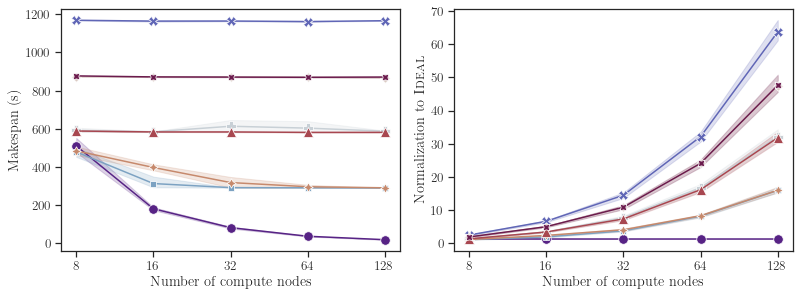

In [25]:
variations = [{'simulation':4, 'data':4, 'node':16}, {'simulation':4, 'data':4, 'analysis':4}, {'simulation':4, 'analysis':4, 'node':16}, {'data':4, 'analysis':4, 'node':64}]
parameters = ['simulation', 'analysis', 'data', 'node']
scenarios = ['ideal', 'transit', 'increasing0.25', 'increasing0.5', 'increasing0.75', 'decreasing0.25', 'decreasing0.5', 'decreasing0.75']
heuristics = ['model-model', 'model-even', 'even-model', 'even-even']
palette = 'twilight_shifted'
# palette = sns.color_palette('twilight_shifted', 4)


# sns.set_palette("twilight_shifted")
# sns.set(font_scale = 1.6)
# sns.set_style("ticks")
# sns.set_context(rc = {'lines.markersize': 12})
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Computer Modern Typewriter",
#     # "figure.figsize": (9,5)
# })
# @interact(variation=variations, heuristic=heuristics)
def plot(variation,heuristic):
    condition = pd.Series(np.full(new_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (new_df[key]==value)
    # condition &= (data_df['heuristic'] == 'model_model')
    condition &= (new_df['heuristic'] == heuristic)
    sub_df = new_df[condition] 
    sub_df['scenario'].replace(scenario_rename_dict, inplace=True)
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4), constrained_layout=True)
    ax1 = sns.lineplot(x=variable, y='time', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[0], dashes=False, palette=palette)
    ax1.set_xscale("log", base=2)
    ax1.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax2 = sns.lineplot(x=variable, y='ideal-normalization', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[1], dashes=False, palette=palette)
    ax2.set_xscale("log", base=2)
    ax2.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    plt_name = ax1.get_xlabel()
    ax1.set_xlabel(xlabel_rename_dict[ax1.get_xlabel()])
    ax1.set_ylabel(ylabel_rename_dict[ax1.get_ylabel()])
    ax2.set_xlabel(xlabel_rename_dict[ax2.get_xlabel()])
    ax2.set_ylabel(ylabel_rename_dict[ax2.get_ylabel()])
    # ax3 = sns.lineplot(x=variable, y='ratio', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[2], dashes=False)
    # ax3.set_xscale("log", base=2)
    # ax3.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    # ax3.legend_.set_title("")
    ax1.legend_.set_title("")
    ax2.legend_.set_title("")
    axes[0].legend().set_visible(False)
    axes[1].legend().set_visible(False)
    # ax1.set_xticks([1,2,4,8,16,32])
    # ax2.set_xticks([1,2,4,8,16,32])
    handles, labels = axes[1].get_legend_handles_labels()
    # fig.legend(handles, labels, bbox_to_anchor=(1, 1.2), borderaxespad=0, ncol=4)
    plt.savefig(plt_name + '.pdf', bbox_inches='tight', dpi=12000)
plot(variations[1],heuristics[0])

In [41]:
# sns.set_palette("twilight_shifted")
variations = [{'simulation':4, 'data':4, 'node':16}, {'simulation':4, 'data':4, 'analysis':4}, {'simulation':4, 'analysis':4, 'node':16}, {'data':4, 'analysis':4, 'node':64}]
@interact(variation=variations, heuristic=heuristics)
def plot(variation,heuristic):
    condition = pd.Series(np.full(new_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (new_df[key]==value)
    # condition &= (data_df['heuristic'] == 'model_model')
    condition &= (new_df['heuristic'] == heuristic)
    sub_df = new_df[condition] 
    sub_df['scenario'].replace(scenario_rename_dict, inplace=True)
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    # fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5), constrained_layout=True)
    ax = sns.lineplot(x=variable, y='time', hue='scenario', style='scenario', data=sub_df, markers=True, dashes=False, palette='twilight_shifted')
    # ax.set_xscale("log", base=2)
    ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax.legend_.set_title("")
    ax.set_rasterized(True)
    ax.set_xlabel(xlabel_rename_dict[ax.get_xlabel()])
    ax.set_ylabel(ylabel_rename_dict[ax.get_ylabel()])
    # ax.set_xlabel('Number of analyses per simulation')
    # ax.set_ylabel('Makespan (s)')

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [48]:
sns.set_palette("twilight_shifted")
variations = [{'simulation':4, 'data':4, 'node':16}, {'simulation':4, 'data':4, 'analysis':4}, {'simulation':4, 'analysis':4, 'node':16}, {'data':4, 'analysis':4, 'node':64}]
@interact(variation=variations, heuristic=heuristics)
def plot(variation,heuristic):
    condition = pd.Series(np.full(new_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (new_df[key]==value)
    # condition &= (data_df['heuristic'] == 'model_model')
    condition &= (new_df['heuristic'] == heuristic)
    sub_df = new_df[condition] 
    sub_df['scenario'].replace(scenario_rename_dict, inplace=True)
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    # fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5), constrained_layout=True)
    ax = sns.lineplot(x=variable, y='ideal-normalization', hue='scenario', style='scenario', data=sub_df, markers=True, dashes=False, palette='twilight_shifted')
    # ax.set_xscale("log", base=2)
    ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax.legend_.set_title("")
    ax.set_xlabel(xlabel_rename_dict[ax.get_xlabel()])
    ax.set_ylabel(ylabel_rename_dict[ax.get_ylabel()])

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [49]:
palette = sns.color_palette('twilight_shifted', 4)
@interact(variation=variations, scenario=scenarios)
def plot(variation,scenario):
    condition = pd.Series(np.full(new_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (new_df[key]==value)
    # condition &= (data_df['heuristic'] == 'model_model')
    sub_df = new_df[condition] 
    sub_df = sub_df[sub_df['scenario'] == scenario]
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4), constrained_layout=True)
    ax1 = sns.lineplot(x=variable, y='time', hue='heuristic', style='heuristic', data=sub_df, markers=True, ax=axes[0], dashes=False)
    ax1.set_xscale("log", base=2)
    ax1.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax1.legend_.set_title("")
    ax2 = sns.lineplot(x=variable, y='model-normalization', hue='heuristic', style='heuristic', data=sub_df, markers=True, ax=axes[1], dashes=False)
    ax2.set_xscale("log", base=2)
    ax2.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax2.legend_.set_title("")
    # ax2.set_ylim([0.8,1.2])

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [50]:
# palette = sns.color_palette('twilight_shifted', 4)
@interact(variation=variations, scenario=scenarios)
def plot(variation,scenario):
    condition = pd.Series(np.full(new_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (new_df[key]==value)
    # condition &= (data_df['heuristic'] == 'model_model')
    sub_df = new_df[condition] 
    sub_df = sub_df[sub_df['scenario'] == scenario]
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4), constrained_layout=True)
    ax = sns.lineplot(x=variable, y='model-normalization', hue='heuristic', style='heuristic', data=sub_df, markers=True, dashes=False)
    ax.set_xscale("log", base=2)
    ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax.legend_.set_title("")
    ax.set_xlabel(xlabel_rename_dict[ax.get_xlabel()])
    ax.set_ylabel(ylabel_rename_dict[ax.get_ylabel()])
    plt.savefig(scenario + '.pdf', bbox_inches='tight', dpi=12000)
    # ax2.set_ylim([0.8,1.2])

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [51]:
bw_csv = "./data_bw.csv"
bw_df = pd.read_csv(bw_csv, comment='#')
type_rename_dict = {'Model(B1)':'Model($B/|P^{NC}|$)', 
                    'Model(B2)':'Model($B/n^{NC}$)', 
                    'Model(B3)':'Model($B/(n^{NC} |P^{NC}|)$)'}
bw_df['type'].replace(type_rename_dict, inplace=True)
bw_df

,simulation,analysis,data,node,trial,scenario,heuristic,type,time,simulator-normalization
0,1,4,4,128,1.0,ideal,model-model,Simulator,5.238700,1.000000
1,1,4,4,128,1.0,ideal,model-model,Model(B),5.062746,1.034755
2,1,4,4,128,1.0,ideal,model-model,Model($B/|P^{NC}|$),5.062746,1.034755
3,1,4,4,128,1.0,ideal,model-model,Model($B/n^{NC}$),5.062746,1.034755
4,1,4,4,128,1.0,ideal,model-model,Model($B/(n^{NC} |P^{NC}|)$),5.062746,1.034755
...,...,...,...,...,...,...,...,...,...,...
12955,8,4,4,128,1.0,decreasing0.75,even-even,Simulator,1735.331700,1.000000
12956,8,4,4,128,1.0,decreasing0.75,even-even,Model(B),256.762659,6.758505
12957,8,4,4,128,1.0,decreasing0.75,even-even,Model($B/|P^{NC}|$),352.595992,4.921587
12958,8,4,4,128,1.0,decreasing0.75,even-even,Model($B/n^{NC}$),609.891542,2.845312


In [52]:
sns.set_context(rc = {'lines.markersize': 9.5})
variations = [{'simulation':4, 'data':4, 'node':16}, {'simulation':4, 'data':4, 'analysis':4}, {'simulation':4, 'analysis':4, 'node':16}, {'data':4, 'analysis':4, 'node':128}]
palette = sns.color_palette('twilight_shifted', 4)
@interact(variation=variations, scenario=scenarios)
def plot(variation,scenario):
    condition = pd.Series(np.full(bw_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (bw_df[key]==value)
    condition &= (bw_df['scenario'] == scenario)
    sub_df = bw_df[condition] 
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4), constrained_layout=True)
    ax1 = sns.lineplot(x=variable, y='time', hue='type', style='type', data=sub_df, markers=True, ax=axes[0], dashes=False)
    ax1.set_xscale("log", base=2)
    ax1.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax1.legend_.set_title("")
    ax2 = sns.lineplot(x=variable, y='simulator-normalization', hue='type', style='type', data=sub_df, markers=True, ax=axes[1], dashes=False, err_style='band')
    ax2.set_xscale("log", base=2)
    ax2.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax2.legend_.set_title("")

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [53]:
@interact(variation=variations, scenario=scenarios)
def plot(variation,scenario):
    condition = pd.Series(np.full(bw_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (bw_df[key]==value)
    condition &= (bw_df['scenario'] == scenario)
    sub_df = bw_df[condition] 
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4), constrained_layout=True)
    ax = sns.lineplot(x=variable, y='simulator-normalization', hue='type', style='type', data=sub_df, markers=True, dashes=False, err_style='band')
    ax.set_xscale("log", base=2)
    ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax.legend_.set_title("")
    ax.set_xlabel('Number of simulations')
    ax.set_ylabel('Normalization to simulator')
    ax.set_ylim([-1,50])
    plt.savefig('bandwidth.pdf', bbox_inches='tight', dpi=12000)

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…